# Dataset

In this notebook we will explore briefly the dataset [1.88 million Wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires) from Kaggle. It is a databaset that contains geo-referenced wildfire records for the last 24 years in the US.

# Imports

In [2]:
import sqlite3
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sqlite_fname = "/mtgp/UDACITY/raw_data/FPA_FOD_20170508.sqlite"

In [4]:
conn = sqlite3.connect(sqlite_fname)

In [5]:
cursor = conn.cursor()
cursor = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
df = pd.DataFrame(cursor.fetchall())

In [6]:
df

,0
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [7]:
cursor = conn.cursor()
cursor.execute("PRAGMA table_info('fires');")
df = pd.DataFrame(cursor.fetchall())

In [8]:
df

,0,1,2,3,4,5
0,0,OBJECTID,integer,1,None,1
1,1,FOD_ID,int32,0,None,0
2,2,FPA_ID,text(100),0,None,0
3,3,SOURCE_SYSTEM_TYPE,text(255),0,None,0
4,4,SOURCE_SYSTEM,text(30),0,None,0
5,5,NWCG_REPORTING_AGENCY,text(255),0,None,0
6,6,NWCG_REPORTING_UNIT_ID,text(255),0,None,0
7,7,NWCG_REPORTING_UNIT_NAME,text(255),0,None,0
8,8,SOURCE_REPORTING_UNIT,text(30),0,None,0
9,9,SOURCE_REPORTING_UNIT_NAME,text(255),0,None,0


In [9]:
cursor = conn.cursor()
cursor = cursor.execute("SELECT DISTINCT(COUNTY) FROM 'fires';")
df = pd.DataFrame(cursor.fetchall())

In [10]:
df

,0
0,63
1,61
2,17
3,3
4,5
...,...
3451,Kahoolawe
3452,Hawaii
3453,Oahu
3454,Molokaii


In [11]:
df = pd.read_sql_query("SELECT * FROM fires;", conn)

In [ ]:
fire_year = df.groupby('FIRE_YEAR').size()

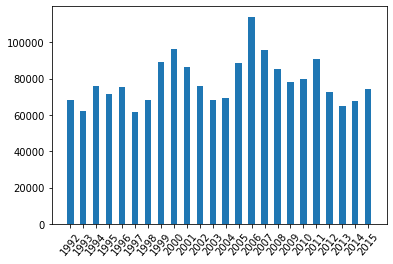

In [16]:
plt.bar(range(len(fire_year)), fire_year.values, width = 0.5)
plt.xticks(range(len(fire_year)), fire_year.index, rotation = 50)
plt.show()

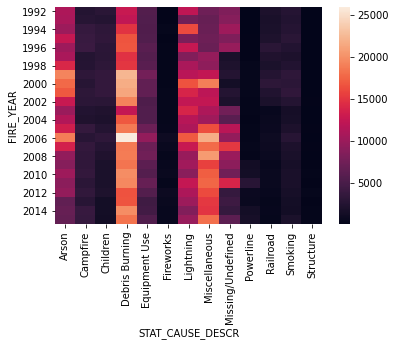

In [17]:
sns.heatmap(pd.crosstab(df.FIRE_YEAR, df.STAT_CAUSE_DESCR))
plt.show()

In [ ]:
# cursor.close()